<a href="https://colab.research.google.com/github/swostika17/CN6005AI/blob/main/week4_Classification_usingperception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

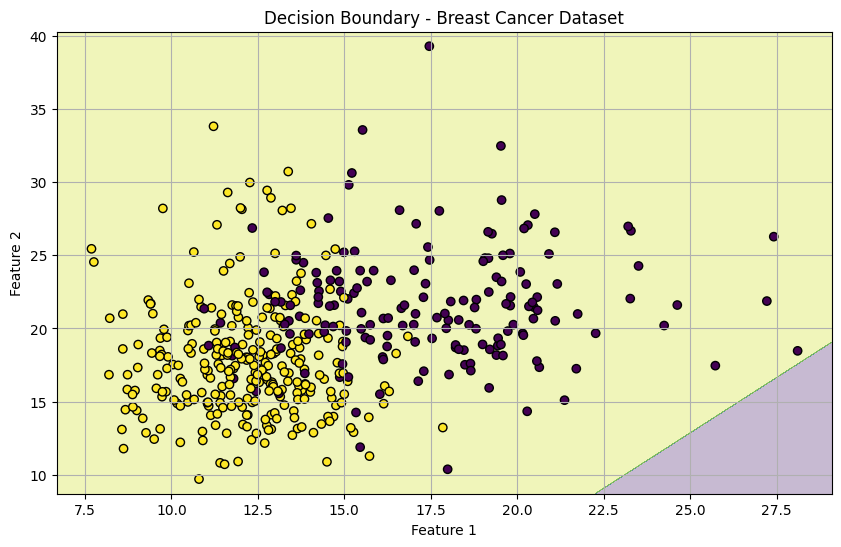

Final Binary Classification Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.62      1.00      0.77        71

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


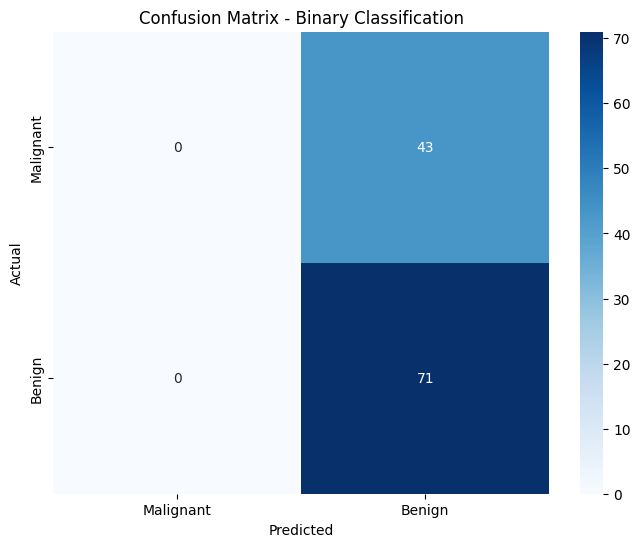

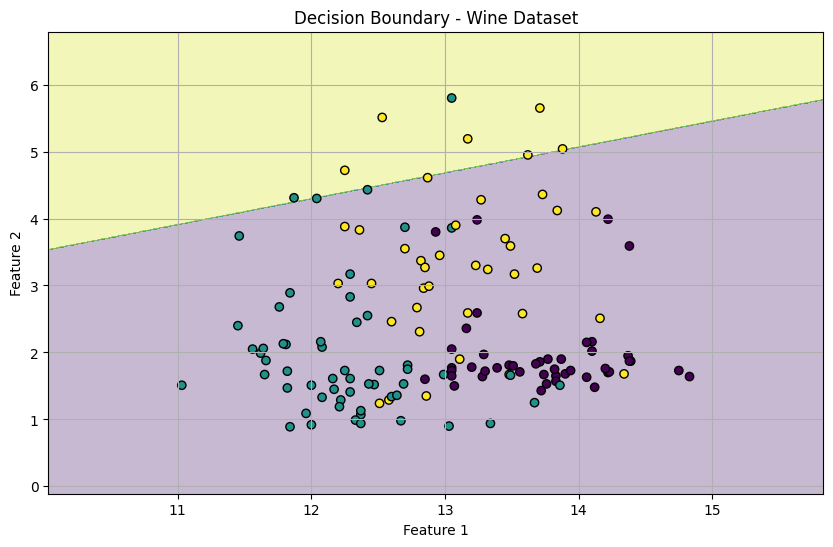

Final Multi-Class Classification Accuracy: 0.39
              precision    recall  f1-score   support

           0       0.39      1.00      0.56        14
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         8

    accuracy                           0.39        36
   macro avg       0.13      0.33      0.19        36
weighted avg       0.15      0.39      0.22        36



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


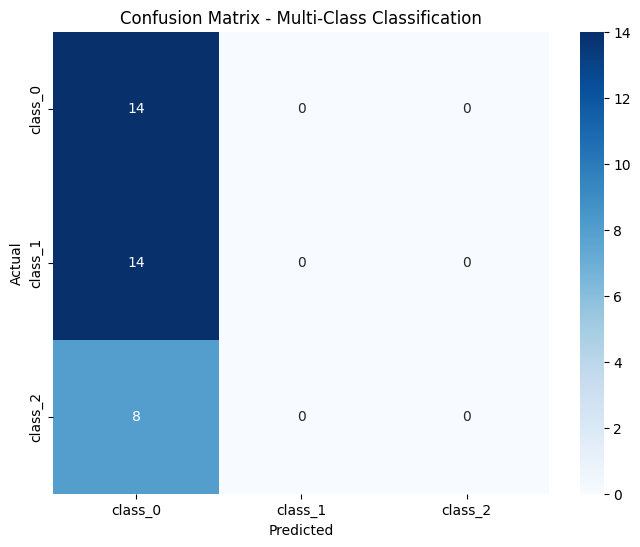

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to train the Perceptron
def train_perceptron(X_train, y_train):
    perceptron = Perceptron(max_iter=1000, random_state=42)
    perceptron.fit(X_train, y_train)
    return perceptron

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    # Create a meshgrid for the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict over the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid()
    plt.show()

# Step 1: Binary Classification with Breast Cancer Dataset
# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_binary = breast_cancer.data
y_binary = breast_cancer.target

# Select only the first two features for visualization
X_binary_vis = X_binary[:, :2]

# Split the dataset into training and testing sets
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary_vis, y_binary, test_size=0.2, random_state=42)

# Train the Perceptron
perceptron_binary = train_perceptron(X_train_binary, y_train_binary)

# Plot decision boundaries for binary classification
plot_decision_boundaries(X_train_binary, y_train_binary, perceptron_binary, 'Decision Boundary - Breast Cancer Dataset')

# Calculate final accuracy
y_pred_binary = perceptron_binary.predict(X_test_binary)
print(f"Final Binary Classification Accuracy: {accuracy_score(y_test_binary, y_pred_binary):.2f}")

# Print classification report
print(classification_report(y_test_binary, y_pred_binary))

# Confusion matrix for binary classification
conf_matrix_binary = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_binary, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix - Binary Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 2: Multi-Class Classification with Wine Dataset
# Load the Wine dataset
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

# Select only the first two features for visualization
X_wine_vis = X_wine[:, :2]

# Split the dataset into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine_vis, y_wine, test_size=0.2, random_state=42)

# Train the Perceptron
perceptron_wine = train_perceptron(X_train_wine, y_train_wine)

# Plot decision boundaries for multi-class classification
plot_decision_boundaries(X_train_wine, y_train_wine, perceptron_wine, 'Decision Boundary - Wine Dataset')

# Calculate final accuracy
y_pred_wine = perceptron_wine.predict(X_test_wine)
print(f"Final Multi-Class Classification Accuracy: {accuracy_score(y_test_wine, y_pred_wine):.2f}")

# Print classification report
print(classification_report(y_test_wine, y_pred_wine))

# Confusion matrix for multi-class classification
conf_matrix_wine = confusion_matrix(y_test_wine, y_pred_wine)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_wine, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix - Multi-Class Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()